## Objectives:

Make a Data Wrangling and determine training labels.

<br>

- Quick overview of the data
- Generating the target variable

<br>

> API URL: https://api.spacexdata.com/v4/

### Setting Up

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import requests
import urllib3
import json
import time

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")

### Quick EDA

In [123]:
print(f'% of dataset null: {sum([_ for _ in df.isna().sum() / len(df) * 100 if _ != 0.0]):.2f}%')

% of dataset null: 28.89%


In [124]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

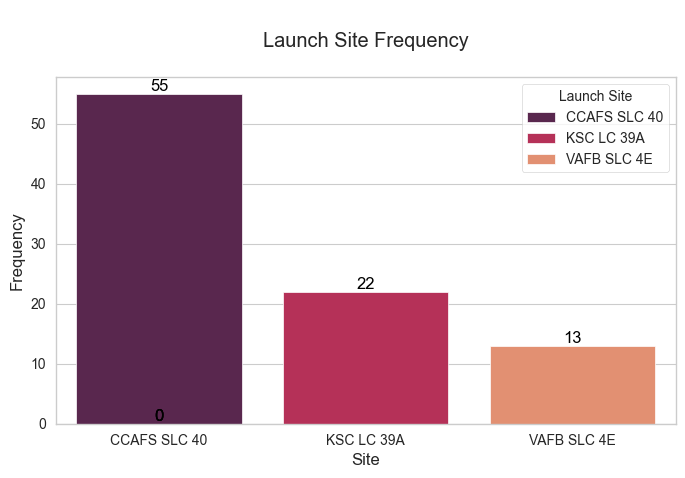

In [136]:
plt.figure(figsize=(8, 4.5))

sns.set_style("whitegrid")

sns.barplot(x=df.LaunchSite.value_counts().index, y=df.LaunchSite.value_counts(), palette='rocket', hue=df.LaunchSite.value_counts().index, legend=True)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, color='black', ha='center', va='bottom')
    

plt.title('\nLaunch Site Frequency\n')
plt.legend(title='Launch Site')
plt.ylabel('Frequency')
plt.xlabel('Site')
plt.show()

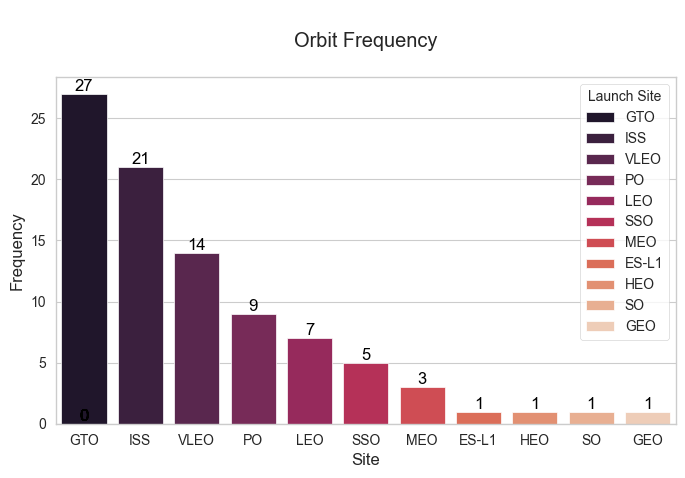

In [146]:
plt.figure(figsize=(8, 4.5))

sns.set_style("whitegrid")

sns.barplot(x=df.Orbit.value_counts().index, y=df.Orbit.value_counts(), palette='rocket', hue=df.Orbit.value_counts().index, legend=True)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, color='black', ha='center', va='bottom')
    

plt.title('\nOrbit Frequency\n')
plt.legend(title='Launch Site')
plt.ylabel('Frequency')
plt.xlabel('Site')
plt.show()

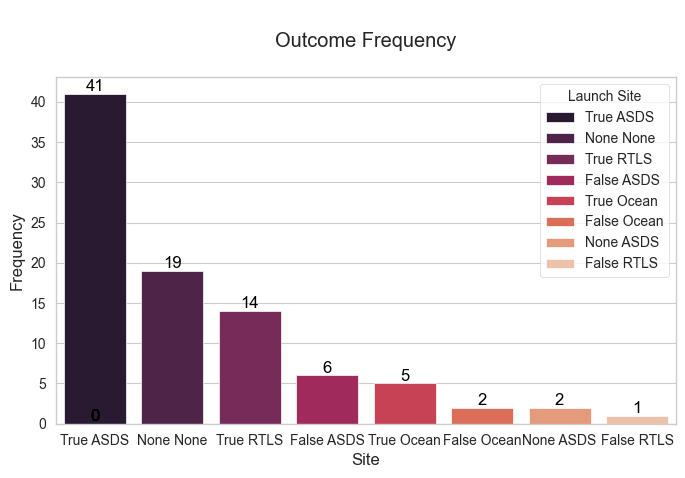

In [147]:
plt.figure(figsize=(8, 4.5))

sns.set_style("whitegrid")

sns.barplot(x=df.Outcome.value_counts().index, y=df.Outcome.value_counts(), palette='rocket', hue=df.Outcome.value_counts().index, legend=True)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, color='black', ha='center', va='bottom')
    

plt.title('\nOutcome Frequency\n')
plt.legend(title='Launch Site')
plt.ylabel('Frequency')
plt.xlabel('Site')
plt.show()

In [158]:
landing_outcomes = df.Outcome.value_counts()
landing_outcomes

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [159]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [161]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [178]:
landing_class = [ 0 if outcome in bad_outcomes else 1 for outcome in df.Outcome ]
df['Class'] = landing_class

df[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [179]:
df.Class.mean()

0.6666666666666666

In [184]:
df.Class.value_counts(True)

Class
1    0.666667
0    0.333333
Name: proportion, dtype: float64

In [187]:
[_ for _ in landing_outcomes.iloc[:, 0] if _ == None]

[]

In [183]:
df.to_csv('data/dataset_part_2.csv', index=False)